# VIPN_XGBoost

In [1]:
#Library
#conda install -c anaconda py-xgboost
#conda update -n base -c defaults conda
#conda install -c conda-forge lightgbm
#pip install missingpy
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgbm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from missingpy import KNNImputer, MissForest
from sklearn.metrics import plot_roc_curve
%matplotlib notebook
from matplotlib import pyplot as plt
from sklearn.metrics import auc
import seaborn as sns
import sklearn
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot
sklearn.__version__
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 400)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

/Users/benjamin/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/benjamin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. A

In [2]:
# Handle Missing Values
#missing_values = ["n/a", "na", "--", "NaN"]
missing_values = ["n/a", "na", "--"]

In [3]:
#path to data
path_to_dataset = "/Users/benjamin/Desktop/Machine_Learning_Bogdan-Beck/VIPN Toxicity/VIPN.csv"

In [4]:
#Read the data with missing values
data = pd.read_csv(path_to_dataset, na_values = missing_values)

In [5]:
#Look at data
peek = data.head(10)
peek

,STUDY,AGE AT DX (MONTHS),SEX,FINAL RISK GROUP,CREATININE at DIAGNOSIS (UMOL/L),PEAK URATE (MMOL/L),BILIRUBIN AT DX (UM/L),GGT AT DX,PEAK CREATININE PROTOCOL 1,PEAK BILIRUBIN PROTOCOL 1 > 3 x ULN?,LOWEST ALBUMIN PROTOCOL 1,PEAK GGT PROTOCOL 1 > 5 X ULN?,PEAK ALT PROTOCOL 1,FUNGAL INFECTION,WHITE CELL COUNT (X 10>9/L),CYTOGENETICS,VIPN
0,COG,50,MALE,SR,0.039,0.18,16.0,NaN,41.0,NO,42.0,NaN,119,NO,6.60,NORMAL,NO
1,COG,104,FEMALE,VHR,51.000,0.23,7.0,27.0,51.0,NO,16.0,YES,924,YES,0.90,HYPODIPLOIDY,NO
2,COG,194,MALE,VHR,70.000,0.44,11.0,NaN,78.0,NO,17.0,NO,120,NO,2.35,HYPODIPLOIDY,NO
3,COG,159,MALE,HR,0.082,0.26,5.0,NaN,162.0,NO,15.0,NaN,131,NO,1.20,TRISOMY21,NO
4,COG,64,MALE,SR,0.038,0.35,8.0,NaN,380.0,NO,34.0,NaN,22,NO,29.90,ETV6RUNX1,NO
5,COG,58,MALE,SR,0.039,0.27,12.0,NaN,45.0,NO,24.0,NaN,54,NO,35.10,HYPERDIPLOIDY,NO
6,COG,143,MALE,HR,41.000,0.35,4.0,13.0,63.0,NO,23.0,NaN,221,NO,6.08,HYPERDIPLOIDY,NO
7,COG,193,MALE,HR,0.109,0.60,14.0,NaN,120.0,NO,27.0,NaN,114,NO,2.90,NORMAL,NO
8,COG,38,FEMALE,SR,0.031,0.24,8.0,NaN,34.0,NO,26.0,NaN,20,NO,44.70,HYPERDIPLOIDY,NO
9,COG,133,FEMALE,HR,56.000,0.90,9.0,NaN,58.0,YES,20.0,NaN,185,NO,5.39,HYPERDIPLOIDY,NO


In [6]:
#Dimensions of Data set
shape = data.shape
print('Dimension: ', shape)

Dimension:  (1251, 17)


In [7]:
# Descriptive statistics 
data.describe()

,AGE AT DX (MONTHS),CREATININE at DIAGNOSIS (UMOL/L),PEAK URATE (MMOL/L),BILIRUBIN AT DX (UM/L),GGT AT DX,PEAK CREATININE PROTOCOL 1,LOWEST ALBUMIN PROTOCOL 1,WHITE CELL COUNT (X 10>9/L)
count,1251.000000,1238.000000,1234.000000,1219.00000,1040.000000,978.000000,1073.000000,1250.000000
mean,76.787370,43.051863,0.339627,8.59475,24.619231,62.076687,25.542404,39.839792
std,50.260851,28.480537,0.186274,7.24800,38.230661,44.688175,5.692388,94.665131
min,9.000000,0.016000,0.020000,1.00000,3.000000,21.000000,10.000000,0.300000
25%,38.000000,31.000000,0.230000,5.00000,11.000000,42.000000,22.000000,4.300000
50%,59.000000,40.000000,0.300000,7.00000,14.000000,52.000000,26.000000,9.700000
75%,108.000000,55.000000,0.390000,10.00000,23.000000,67.000000,29.000000,28.275000
max,227.000000,630.000000,2.380000,116.00000,580.000000,630.000000,44.000000,1065.600000


In [8]:
# assign datset as df
df=data

In [9]:
#data type
for i, it in enumerate(df.dtypes):
    print(i, ' => ', it)

0  =>  object
1  =>  int64
2  =>  object
3  =>  object
4  =>  float64
5  =>  float64
6  =>  float64
7  =>  float64
8  =>  float64
9  =>  object
10  =>  float64
11  =>  object
12  =>  object
13  =>  object
14  =>  float64
15  =>  object
16  =>  object


In [10]:
# varibales used in the model (by column)
print("Feature names:")
for i, col in enumerate(df.columns):
    print(i, ' => ', col)

Feature names:
0  =>  STUDY
1  =>  AGE AT DX (MONTHS)
2  =>  SEX
3  =>  FINAL RISK GROUP
4  =>  CREATININE at DIAGNOSIS (UMOL/L)
5  =>  PEAK URATE (MMOL/L)
6  =>  BILIRUBIN AT DX (UM/L)
7  =>  GGT AT DX
8  =>  PEAK CREATININE PROTOCOL 1
9  =>  PEAK BILIRUBIN PROTOCOL 1 > 3 x ULN?
10  =>  LOWEST ALBUMIN PROTOCOL 1
11  =>  PEAK GGT PROTOCOL 1 > 5 X ULN?
12  =>  PEAK ALT PROTOCOL 1
13  =>  FUNGAL INFECTION 
14  =>  WHITE CELL COUNT (X 10>9/L)
15  =>  CYTOGENETICS
16  =>  VIPN


In [11]:
#encode categorical variables
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

from sklearn.preprocessing import LabelEncoder

print(categorical_cols)

['STUDY', 'SEX', 'FINAL RISK GROUP', 'PEAK BILIRUBIN PROTOCOL 1 > 3 x ULN?', 'PEAK GGT PROTOCOL 1 > 5 X ULN?', 'PEAK ALT PROTOCOL 1', 'FUNGAL INFECTION ', 'CYTOGENETICS', 'VIPN']


In [12]:
#categorical values peek
df[categorical_cols].head(16)

,STUDY,SEX,FINAL RISK GROUP,PEAK BILIRUBIN PROTOCOL 1 > 3 x ULN?,PEAK GGT PROTOCOL 1 > 5 X ULN?,PEAK ALT PROTOCOL 1,FUNGAL INFECTION,CYTOGENETICS,VIPN
0,COG,MALE,SR,NO,NaN,119,NO,NORMAL,NO
1,COG,FEMALE,VHR,NO,YES,924,YES,HYPODIPLOIDY,NO
2,COG,MALE,VHR,NO,NO,120,NO,HYPODIPLOIDY,NO
3,COG,MALE,HR,NO,NaN,131,NO,TRISOMY21,NO
4,COG,MALE,SR,NO,NaN,22,NO,ETV6RUNX1,NO
5,COG,MALE,SR,NO,NaN,54,NO,HYPERDIPLOIDY,NO
6,COG,MALE,HR,NO,NaN,221,NO,HYPERDIPLOIDY,NO
7,COG,MALE,HR,NO,NaN,114,NO,NORMAL,NO
8,COG,FEMALE,SR,NO,NaN,20,NO,HYPERDIPLOIDY,NO
9,COG,FEMALE,HR,YES,NaN,185,NO,HYPERDIPLOIDY,NO


In [13]:
#categorical encoding 
def categorical_feature_encoder(df, cat_features):
    _df = df.copy()
    lbEncoder = LabelEncoder()
    for col in cat_features:
        # Not NaN index
        idx = ~_df[col].isna()
        _df.loc[idx, col] = lbEncoder.fit(_df.loc[idx, col]).transform(_df.loc[idx, col])
        
    return _df

In [14]:
# apply label encoding on categorical feature columns
df = categorical_feature_encoder(df, categorical_cols)

df.head(10)

,STUDY,AGE AT DX (MONTHS),SEX,FINAL RISK GROUP,CREATININE at DIAGNOSIS (UMOL/L),PEAK URATE (MMOL/L),BILIRUBIN AT DX (UM/L),GGT AT DX,PEAK CREATININE PROTOCOL 1,PEAK BILIRUBIN PROTOCOL 1 > 3 x ULN?,LOWEST ALBUMIN PROTOCOL 1,PEAK GGT PROTOCOL 1 > 5 X ULN?,PEAK ALT PROTOCOL 1,FUNGAL INFECTION,WHITE CELL COUNT (X 10>9/L),CYTOGENETICS,VIPN
0,1,50,1,3,0.039,0.18,16.0,NaN,41.0,0,42.0,NaN,28,0,6.60,7,0
1,1,104,0,5,51.000,0.23,7.0,27.0,51.0,0,16.0,1,449,1,0.90,5,0
2,1,194,1,5,70.000,0.44,11.0,NaN,78.0,0,17.0,0,29,0,2.35,5,0
3,1,159,1,0,0.082,0.26,5.0,NaN,162.0,0,15.0,NaN,42,0,1.20,10,0
4,1,64,1,3,0.038,0.35,8.0,NaN,380.0,0,34.0,NaN,138,0,29.90,2,0
5,1,58,1,3,0.039,0.27,12.0,NaN,45.0,0,24.0,NaN,349,0,35.10,3,0
6,1,143,1,0,41.000,0.35,4.0,13.0,63.0,0,23.0,NaN,140,0,6.08,3,0
7,1,193,1,0,0.109,0.60,14.0,NaN,120.0,0,27.0,NaN,21,0,2.90,7,0
8,1,38,0,3,0.031,0.24,8.0,NaN,34.0,0,26.0,NaN,119,0,44.70,3,0
9,1,133,0,0,56.000,0.90,9.0,NaN,58.0,1,20.0,NaN,105,0,5.39,3,0


In [15]:
#assess array minus VIPN column
y = df.iloc[:, -1].values
y = y.astype(np.int)
y

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
#print dimension
print(y.shape)

(1251,)


In [17]:
#integer-location based indexing for selection by position.
X = df.iloc[:, 0:-1].values
X = X.astype(np.float64)
print('Dimension: ', X.shape)
X[0:5, 143:147]

Dimension:  (1251, 16)


array([], shape=(5, 0), dtype=float64)

In [18]:
#print X
X

array([[  1.  ,  50.  ,   1.  , ...,   0.  ,   6.6 ,   7.  ],
       [  1.  , 104.  ,   0.  , ...,   1.  ,   0.9 ,   5.  ],
       [  1.  , 194.  ,   1.  , ...,   0.  ,   2.35,   5.  ],
       ...,
       [  0.  , 141.  ,   0.  , ...,   0.  ,  21.8 ,   3.  ],
       [  0.  ,  65.  ,   0.  , ...,   0.  ,   3.39,   3.  ],
       [  0.  ,  93.  ,   0.  , ...,   0.  ,   3.57,   2.  ]])

In [19]:
# Asess target varibale
pd.value_counts(df['VIPN'].values, sort=False)

0    1198
1    53  
dtype: int64

<IPython.core.display.Javascript object>


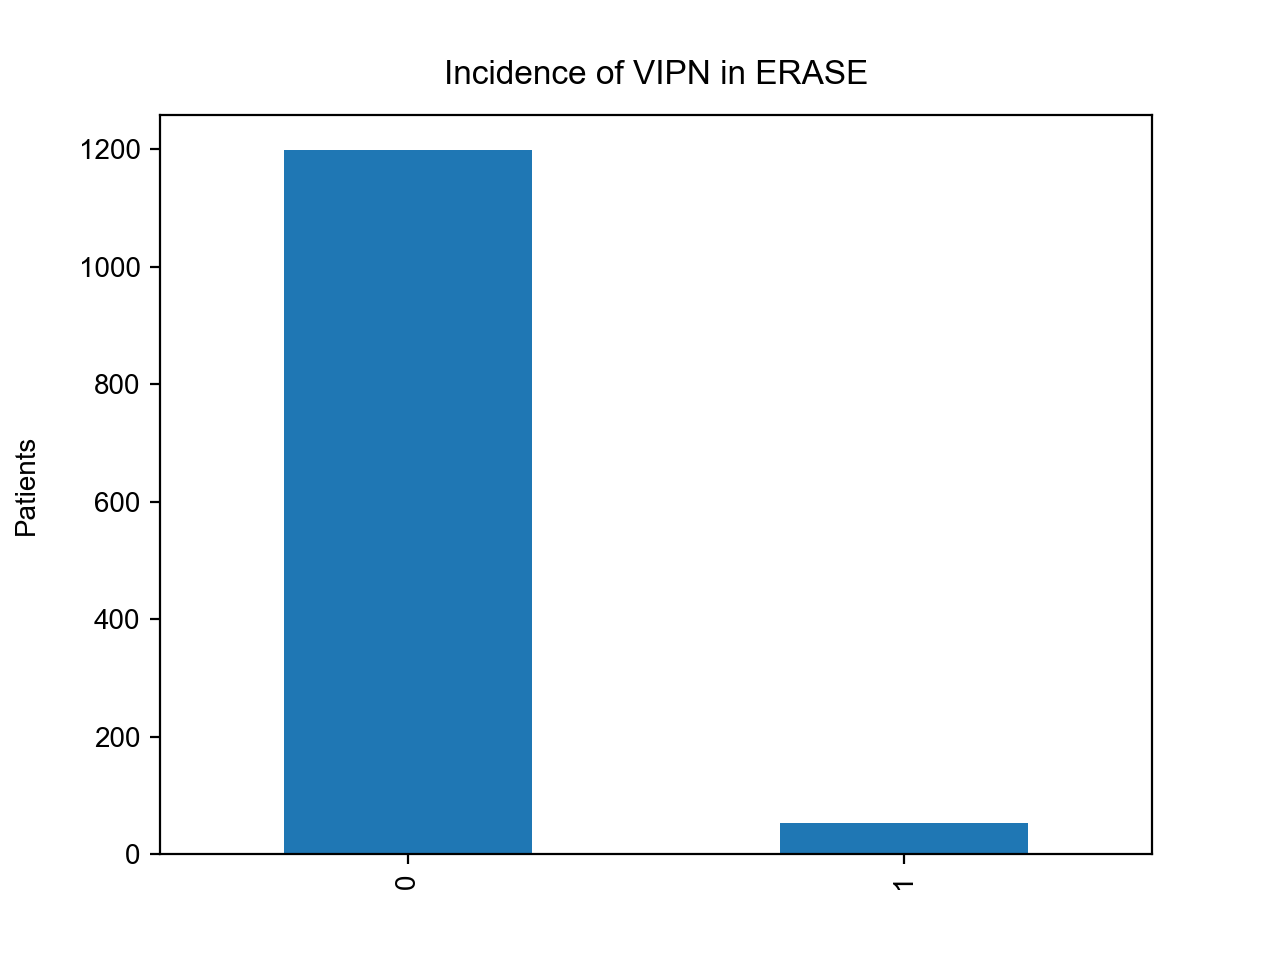

In [20]:
#Plot incidence 
ax = df['VIPN'].value_counts().plot(kind='bar')
plt.ylabel("Patients", labelpad=14)
plt.title("Incidence of VIPN in ERASE", y=1.02);
plt.show()

# Precosessing: standardisation, imputation, resampling, and scoring 

In [21]:
cat_features = np.nonzero(categorical_feature_mask.values[0:-1])[0]
print(cat_features)
num_features = np.nonzero(~categorical_feature_mask.values[0:-1])[0]
print(num_features)
#conda install -c conda-forge imbalanced-learn

[ 0  2  3  9 11 12 13 15]
[ 1  4  5  6  7  8 10 14]


In [22]:
#standardise data
#imputation mean for numerical, mode for categorical  
def standar_scaler(Xtr, Xtest, index_numeric_features):
    """
    Only doing standarization for numeric features
    """
    Xtr_z = Xtr.copy()
    Xtest_z = Xtest.copy()
    mean = np.nanmean(Xtr_z[:, index_numeric_features], axis=0)
    std = np.nanstd(Xtr_z[:, index_numeric_features], axis=0)
    Xtr_z[:, index_numeric_features] = (Xtr[:, index_numeric_features] - mean)/std 
    Xtest_z[:, index_numeric_features]  = (Xtest[:, index_numeric_features] - mean)/std
    
    return (Xtr_z, Xtest_z)

from scipy.stats import mode
def data_imputation(Xtr, Xtest, index_cat_features, index_numeric_features):
    """
        Categorical features: using most frequent values for missing features
        Numerical features: using mean values for missing features
    """
    Xtr_ = Xtr.copy()
    Xtest_ = Xtest.copy()
    mean_vals = np.nanmean(Xtr[:, index_numeric_features], axis=0)
    mean_vals = np.where(np.isnan(mean_vals), 0, mean_vals)
    most_freq_values = mode(Xtr[:, index_cat_features], 0)[0][0]
    most_freq_values = np.where(np.isnan(most_freq_values), 0, most_freq_values)
    # replace missing values in training set
    Xtr_[:, index_numeric_features] = np.where(np.isnan(Xtr_[:, index_numeric_features]), mean_vals, Xtr_[:, index_numeric_features])
    Xtr_[:, index_cat_features] = np.where(np.isnan(Xtr_[:, index_cat_features]), most_freq_values, Xtr_[:, index_cat_features])
    
    # replace missing values in testing set
    Xtest_[:, index_numeric_features] = np.where(np.isnan(Xtest_[:, index_numeric_features]), mean_vals, Xtest_[:, index_numeric_features])
    Xtest_[:, index_cat_features] = np.where(np.isnan(Xtest_[:, index_cat_features]), most_freq_values, Xtest_[:, index_cat_features])
    
    return (Xtr_, Xtest_)

#cross validation 
num_split_validation = 10 

#Resampling techniques

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
#Fit model
def model_training_and_evaluation(model, X, y, is_imputation=False, num_features=None, cat_features=None, random_state=0, is_sampling=True):
    """
        cat_features and num_features are array-like containing indices of columns with categorical and numeric features
        
        Return average, min, and max values of accuracy and f1-measure scores
    """
    #statified k-fold fold to mainatin proportions per fold validation traing and split
    skf = StratifiedKFold(n_splits=num_split_validation, random_state=random_state, shuffle=False)
    f1_scores_ls = []
    accuracy_score_ls = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Feature scaling
        X_train, X_test = standar_scaler(X_train, X_test, num_features)
        
        if is_imputation:
            X_train, X_test = data_imputation(X_train, X_test, cat_features, num_features)
        
        #if is_sampling:
            #ros = RandomOverSampler(random_state=random_state)
            #ros = BorderlineSMOTE(random_state=random_state, k_neighbors=5)
            #ros = SMOTE(random_state=random_state)
            #X_train, y_train = ros.fit_resample(X_train, y_train)
        
        # Training model
        
        model.fit(X_train, y_train)
        
        # get prediction with scoring 
        try:
            y_pred = model.predict(X_test)
            # compute scores
            # class 1 is positive class, which is the class with a smaller number of samples
            f1 = f1_score(y_test, y_pred, pos_label=0)
            acc = accuracy_score(y_test, y_pred)

            f1_scores_ls.append(f1)
            accuracy_score_ls.append(acc)
        except Exception as ex:
            print('NaN value: ', np.where(np.isnan(X_test)))
            print('Min value: ', np.min(X_test))
            print('Max value: ', np.max(X_test))
            print(ex)
        
    avg_acc = sum(accuracy_score_ls) / len(accuracy_score_ls)
    min_acc = min(accuracy_score_ls)
    max_acc = max(accuracy_score_ls)
    
    avg_f1 = sum(f1_scores_ls) / len(f1_scores_ls)
    min_f1 = min(f1_scores_ls)
    max_f1 = max(f1_scores_ls)
    
    return (avg_acc, min_acc, max_acc, avg_f1, min_f1, max_f1)

In [23]:
#confirm standardisation and size of categorical vs numerical features
cat_features = categorical_feature_mask.values[0:-1] 
print(cat_features.size)
num_features = ~cat_features
print(num_features.size)

16
16


In [24]:
#Confirm version and set random state
#conda install scikit-learn=0.23.1
# define a random state variable
rd_state = 10

In [25]:
#Confirm number of categorical features and total variables
cat_features = categorical_feature_mask.values[0:-1] 
print(cat_features.size)
num_features = ~cat_features
print(num_features.size)

16
16


# XGBoost and Machine Learning Algorithms 

In [26]:
## For ROC Curve generation with cross-validation for machine learning algorithms
# classifier: the classifier used (using constructor of classes for classifiers)
# X: features to split into training and testing sets using k-fold cross-validation
# y: classes corresponding to samples stored in X
# cat_features: indices of categorical features in X
# num_features: indices of numerical features in X
# k_fold: number of folds to split
def draw_roc_curve_cross_validation(classifier, X, y, cat_features, num_features, k_fold=10):
    cv = StratifiedKFold(n_splits=k_fold)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train_index, test_index) in enumerate(cv.split(X, y)):
        Xtr, Xtest = X[train_index], X[test_index]
        ytr, ytest = y[train_index], y[test_index]

        Xtr, Xtest = data_imputation(Xtr, Xtest, cat_features, num_features) # data imputation

        Xtr, Xtest = standar_scaler(Xtr, Xtest, num_features) # standarization scale

        classifier.fit(Xtr, ytr)
        viz = plot_roc_curve(classifier, Xtest, ytest,
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve")
    ax.legend(loc="lower right")
    plt.show()


In [27]:
#Classification metrics and plotting for AUC

## For ROC Curve generation with cross-validation for machine learning algorithms
# classifier: the classifier used (using constructor of classes for classifiers)
# X: features to split into training and testing sets using k-fold cross-validation
# y: classes corresponding to samples stored in X
# cat_features: indices of categorical features in X
# num_features: indices of numerical features in X
# k_fold: number of folds to split
def draw_roc_curve_cross_validation(classifier, X, y, cat_features, num_features, k_fold=10):
    cv = StratifiedKFold(n_splits=k_fold)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train_index, test_index) in enumerate(cv.split(X, y)):
        Xtr, Xtest = X[train_index], X[test_index]
        ytr, ytest = y[train_index], y[test_index]

        Xtr, Xtest = data_imputation(Xtr, Xtest, cat_features, num_features) # data imputation

        Xtr, Xtest = standar_scaler(Xtr, Xtest, num_features) # standarization scale

        classifier.fit(Xtr, ytr)
        viz = plot_roc_curve(classifier, Xtest, ytest,
                             name='ROC fold {}'.format(i),
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve")
    ax.legend(loc="lower right")
    plt.show()


In [28]:
## Classification: Confusion matrix with stratified K fold


In [29]:
# Using gradient boosted tree
xg_classifier = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.05, n_estimators = 100)
avg_acc_xgb, min_acc_xgb, max_acc_xgb, avg_f1_xgb, min_f1_xgb, max_f1_xgb = model_training_and_evaluation(xg_classifier, X, y, True, num_features)

In [30]:
# Display result:
print("XGBoost with 10-fold cross-validation:")
print("Average accuracy = ", avg_acc_xgb)
print("Min accuracy = ", min_acc_xgb)
print("Max accuracy = ", max_acc_xgb)
print("Average F1 = ", avg_f1_xgb)
print("Min F1 = ", min_f1_xgb)
print("Max F1 = ", max_f1_xgb)

XGBoost with 10-fold cross-validation:
Average accuracy =  0.9576380952380953
Min accuracy =  0.952
Max accuracy =  0.96
Average F1 =  0.9783572285371566
Min F1 =  0.9754098360655737
Max F1 =  0.9795918367346939


<IPython.core.display.Javascript object>


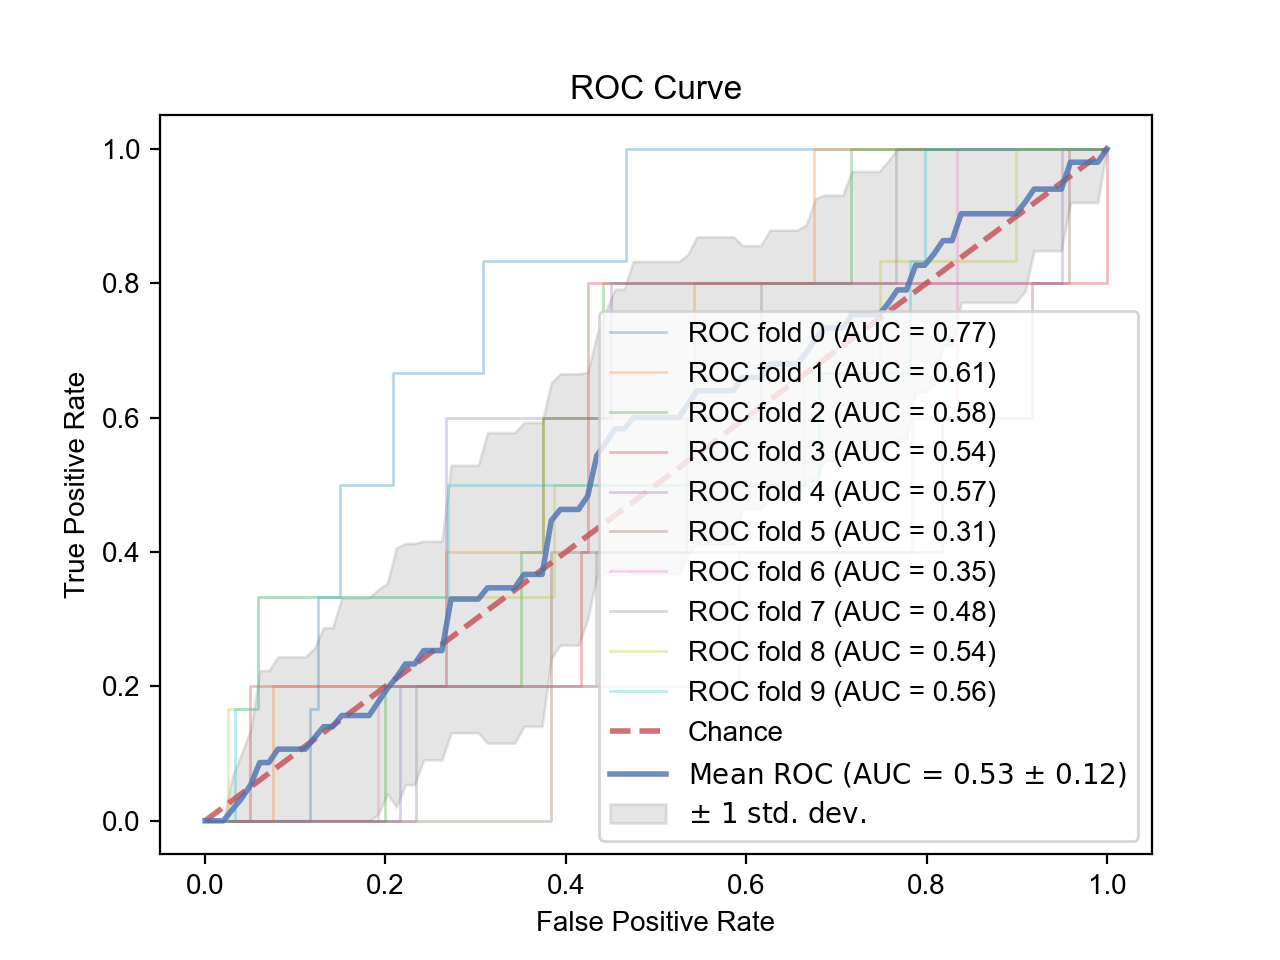

In [31]:
# Call function to draw ROC curve for XGBoost 
draw_roc_curve_cross_validation(classifier=xg_classifier, X=X, y=y, cat_features=cat_features, num_features=num_features, k_fold=10)

Confusion matrices of XGBoost:
Iteration  1 :


<IPython.core.display.Javascript object>


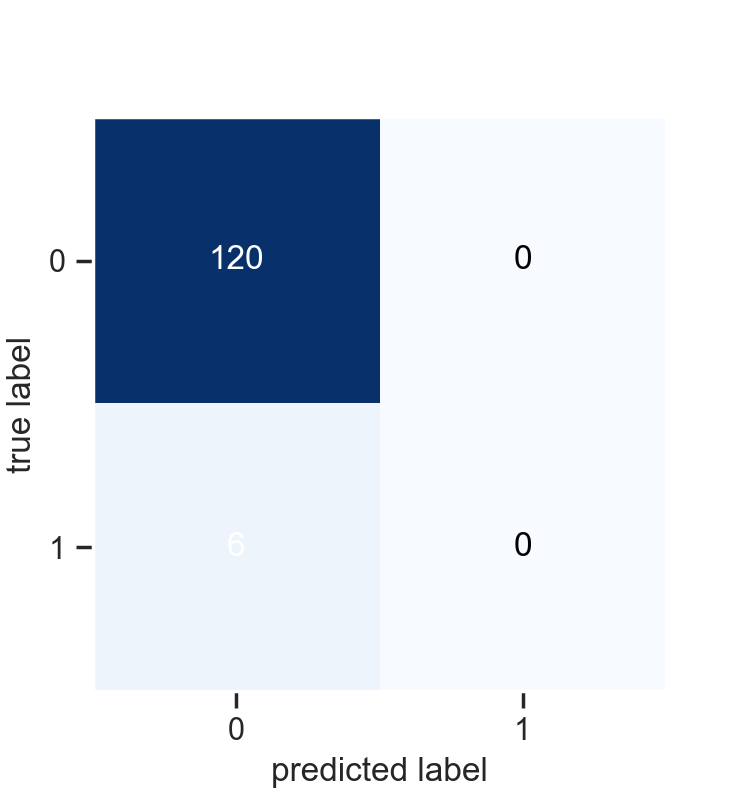

Iteration  2 :


<IPython.core.display.Javascript object>


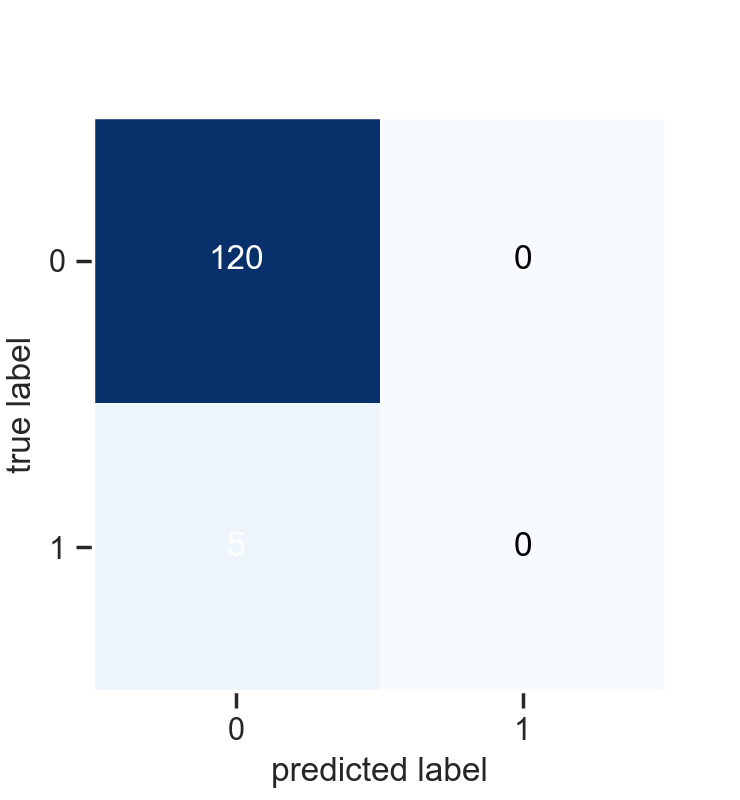

Iteration  3 :


<IPython.core.display.Javascript object>


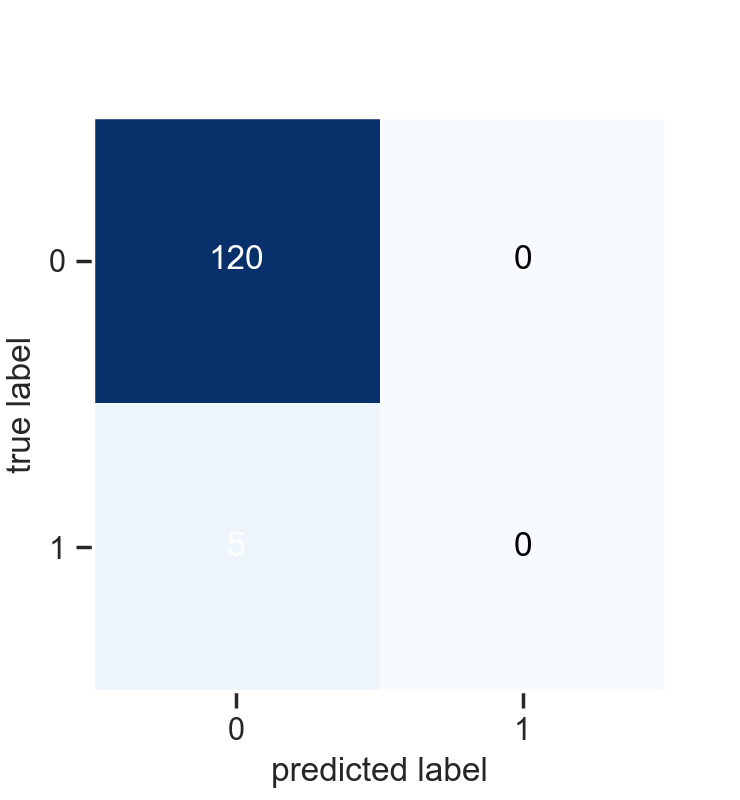

Iteration  4 :


<IPython.core.display.Javascript object>


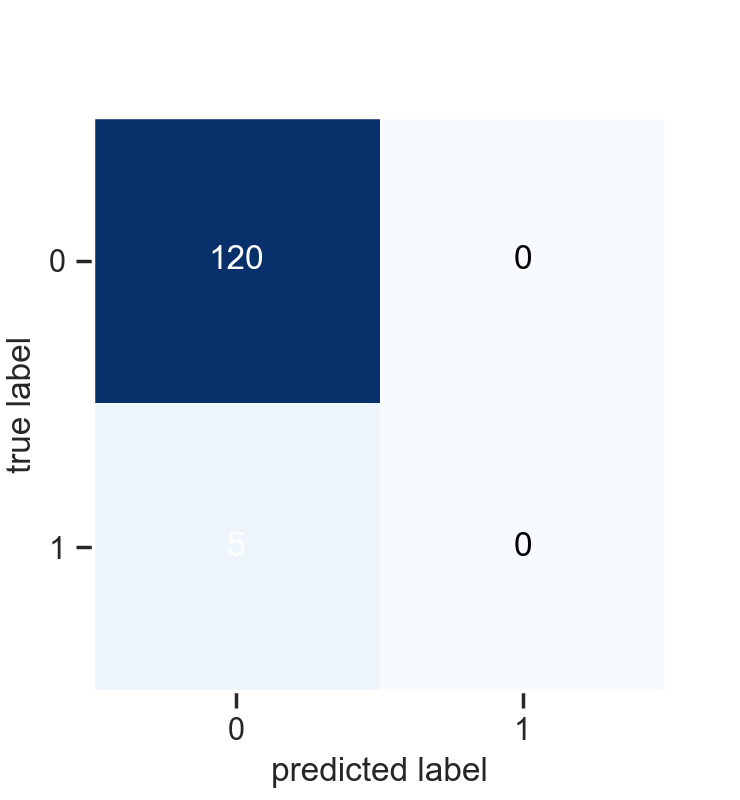

Iteration  5 :


<IPython.core.display.Javascript object>


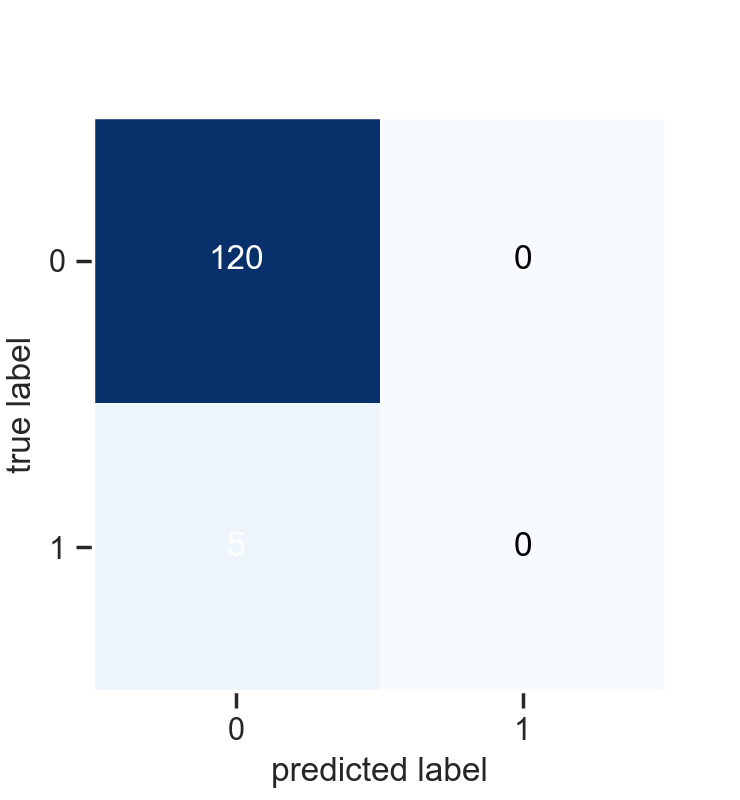

Iteration  6 :


<IPython.core.display.Javascript object>


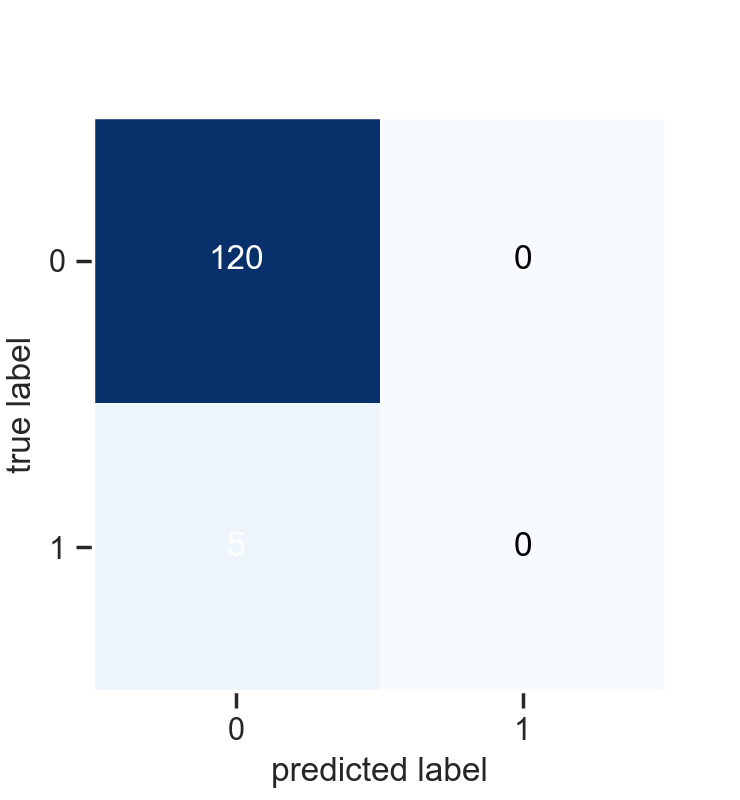

Iteration  7 :


<IPython.core.display.Javascript object>


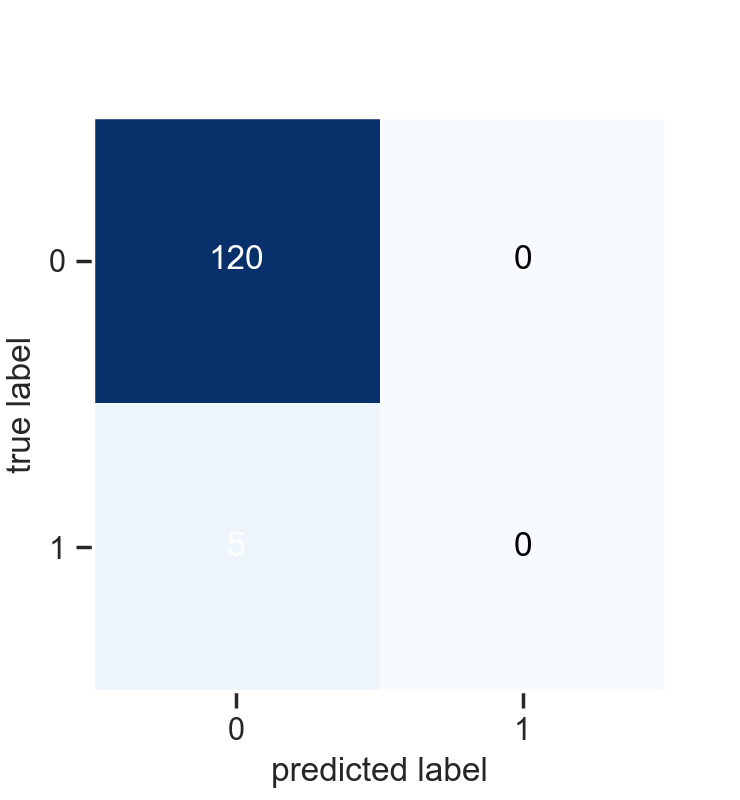

Iteration  8 :


<IPython.core.display.Javascript object>


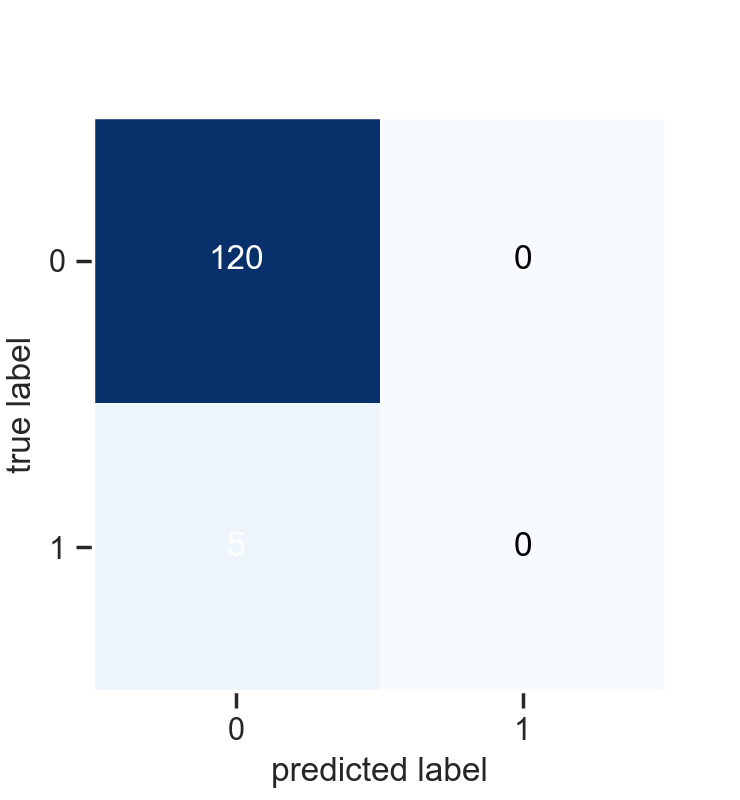

Iteration  9 :


<IPython.core.display.Javascript object>


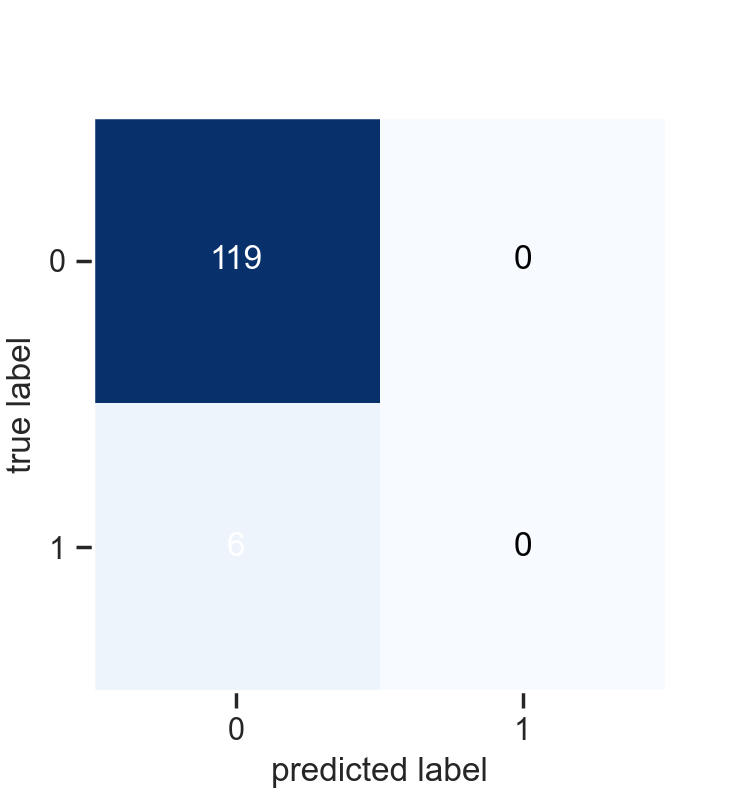

Iteration  10 :


<IPython.core.display.Javascript object>


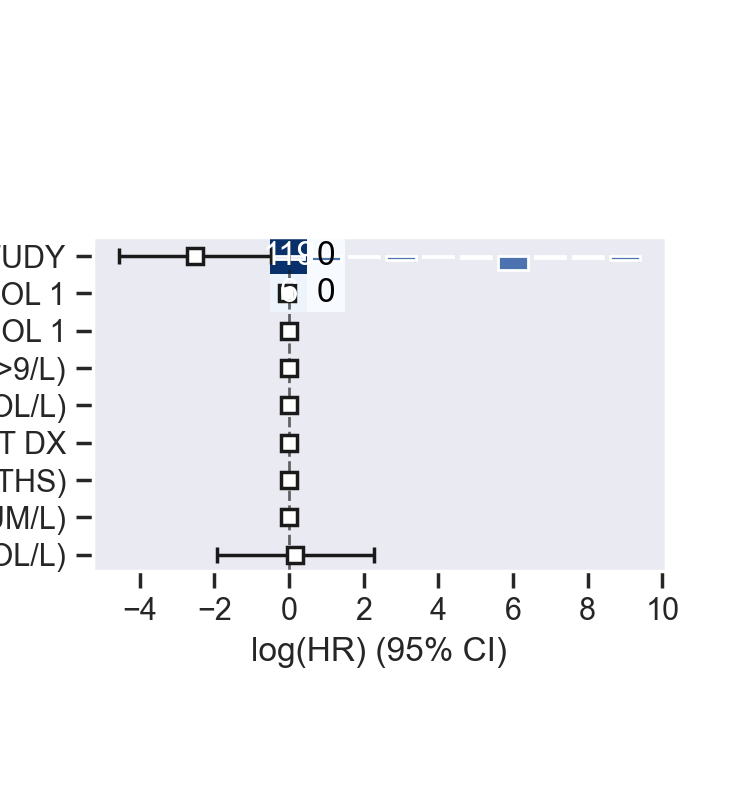

In [32]:
#Show confusion matrix stratified k fold
def show_confusion_matrix(model, X, y, is_imputation=True, num_features=None, cat_features=None, random_state=10):
    """
        Show confusion matrix for each run on each fold
    """
    skf = StratifiedKFold(n_splits=num_split_validation, random_state=random_state, shuffle=False)
    loop = 1
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Feature scaling
        X_train, X_test = standar_scaler(X_train, X_test, num_features)
        
        if is_imputation:
            X_train, X_test = data_imputation(X_train, X_test, cat_features, num_features)
        
        # Training model
        model.fit(X_train, y_train)
        
        # get prediction
        try:
            y_pred = model.predict(X_test)
            print("Iteration ", loop, ":")
            confm = confusion_matrix(y_test, y_pred)
            sns.set(font_scale=1.0)
            fig, ax = plot_confusion_matrix(conf_mat=confm)
            fig.set_size_inches(3.7, 4, forward=True)
            plt.show()
            loop = loop + 1
        except Exception as ex:
            print(ex)


print("Confusion matrices of XGBoost:")
show_confusion_matrix(xg_classifier, X, y, True, num_features)

In [33]:
#XGBoost Feature Ranking
#from sklearn.datasets import make_classification

# define dataset
X1, y2 = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=10)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X1, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.06742
Feature: 1, Score: 0.12240
Feature: 2, Score: 0.03292
Feature: 3, Score: 0.09993
Feature: 4, Score: 0.03324
Feature: 5, Score: 0.03959
Feature: 6, Score: 0.38131
Feature: 7, Score: 0.04218
Feature: 8, Score: 0.06359
Feature: 9, Score: 0.11743


In [38]:
## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
df_cox= df
df_cox.head() ## have a look at the data

,STUDY,AGE AT DX (MONTHS),SEX,FINAL RISK GROUP,CREATININE at DIAGNOSIS (UMOL/L),PEAK URATE (MMOL/L),BILIRUBIN AT DX (UM/L),GGT AT DX,PEAK CREATININE PROTOCOL 1,PEAK BILIRUBIN PROTOCOL 1 > 3 x ULN?,LOWEST ALBUMIN PROTOCOL 1,PEAK GGT PROTOCOL 1 > 5 X ULN?,PEAK ALT PROTOCOL 1,FUNGAL INFECTION,WHITE CELL COUNT (X 10>9/L),CYTOGENETICS,VIPN
0,1,50,1,3,0.039,0.18,16.0,NaN,41.0,0,42.0,NaN,28,0,6.60,7,0
1,1,104,0,5,51.000,0.23,7.0,27.0,51.0,0,16.0,1,449,1,0.90,5,0
2,1,194,1,5,70.000,0.44,11.0,NaN,78.0,0,17.0,0,29,0,2.35,5,0
3,1,159,1,0,0.082,0.26,5.0,NaN,162.0,0,15.0,NaN,42,0,1.20,10,0
4,1,64,1,3,0.038,0.35,8.0,NaN,380.0,0,34.0,NaN,138,0,29.90,2,0


In [39]:
# Nan values present. Need to impute. 

# 1. Remove categorial 
df_data = df.select_dtypes(exclude=   
                 ["object"]).copy()
# 2. Fit the numerical data to Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(df_data)
# 3.
X = imputer.transform(df_data)
df_data_tr = pd.DataFrame(X, columns=df_data.columns, 
                    index=df_data.index)

In [40]:
from lifelines import CoxPHFitter
## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
df_xgb=df_data_tr
df_xgb.head() ## have a look at the data

,STUDY,AGE AT DX (MONTHS),SEX,CREATININE at DIAGNOSIS (UMOL/L),PEAK URATE (MMOL/L),BILIRUBIN AT DX (UM/L),GGT AT DX,PEAK CREATININE PROTOCOL 1,LOWEST ALBUMIN PROTOCOL 1,WHITE CELL COUNT (X 10>9/L),VIPN
0,1.0,50.0,1.0,0.039,0.18,16.0,24.619231,41.0,42.0,6.60,0.0
1,1.0,104.0,0.0,51.000,0.23,7.0,27.000000,51.0,16.0,0.90,0.0
2,1.0,194.0,1.0,70.000,0.44,11.0,24.619231,78.0,17.0,2.35,0.0
3,1.0,159.0,1.0,0.082,0.26,5.0,24.619231,162.0,15.0,1.20,0.0
4,1.0,64.0,1.0,0.038,0.35,8.0,24.619231,380.0,34.0,29.90,0.0


In [41]:
# Create dummy variables
df_dummy = pd.get_dummies(df_xgb, drop_first=True)
df_dummy.head()

,STUDY,AGE AT DX (MONTHS),SEX,CREATININE at DIAGNOSIS (UMOL/L),PEAK URATE (MMOL/L),BILIRUBIN AT DX (UM/L),GGT AT DX,PEAK CREATININE PROTOCOL 1,LOWEST ALBUMIN PROTOCOL 1,WHITE CELL COUNT (X 10>9/L),VIPN
0,1.0,50.0,1.0,0.039,0.18,16.0,24.619231,41.0,42.0,6.60,0.0
1,1.0,104.0,0.0,51.000,0.23,7.0,27.000000,51.0,16.0,0.90,0.0
2,1.0,194.0,1.0,70.000,0.44,11.0,24.619231,78.0,17.0,2.35,0.0
3,1.0,159.0,1.0,0.082,0.26,5.0,24.619231,162.0,15.0,1.20,0.0
4,1.0,64.0,1.0,0.038,0.35,8.0,24.619231,380.0,34.0,29.90,0.0


In [42]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'SEX', event_col='VIPN')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features
cph.plot()

<lifelines.CoxPHFitter: fitted with 1251 total observations, 1198 right-censored observations>
             duration col = 'SEX'
                event col = 'VIPN'
      baseline estimation = breslow
   number of observations = 1251
number of events observed = 53
   partial log-likelihood = -346.47
         time fit was run = 2021-01-16 04:01:46 UTC

---
                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                
STUDY                            -2.52  0.08       1.04       -4.57            -0.48            0.01                 0.62                
AGE AT DX (MONTHS)               0.00   1.00       0.00       -0.00            0.01             1.00                 1.01                
CREATININE at DIAGNOSIS (UMOL/L) 0.00   1.00       0.01       -0.02            0.03             0.98                 1.03                
PEAK URATE (MMOL/L)              0.17   1.19       1.07       -1.93            2.27             0.15                 9.71                
BILIRUBIN AT DX (UM/L)           0.00   1.00       0.01       -0.03            0.03             0.98                 1.03                
GGT AT DX                        0.00   1.00       0.00       -0.00            0.01             1.00                 1.01                
PEAK CREATININE PROTOCOL 1       -0.01  0.99       0.01       -0.03            0.01             0.97                 1.01                
LOWEST ALBUMIN PROTOCOL 1        -0.05  0.95       0.03       -0.11            -0.00            0.90                 1.00                
WHITE CELL COUNT (X 10>9/L)      -0.00  1.00       0.00       -0.00            0.00             1.00                 1.00                

                                     z    p   -log2(p)
covariate                                             
STUDY                            -2.42 0.02 6.00      
AGE AT DX (MONTHS)               0.67  0.50 0.99      
CREATININE at DIAGNOSIS (UMOL/L) 0.18  0.86 0.22      
PEAK URATE (MMOL/L)              0.16  0.87 0.20      
BILIRUBIN AT DX (UM/L)           0.26  0.79 0.33      
GGT AT DX                        0.92  0.36 1.48      
PEAK CREATININE PROTOCOL 1       -1.27 0.21 2.29      
LOWEST ALBUMIN PROTOCOL 1        -2.00 0.05 4.45      
WHITE CELL COUNT (X 10>9/L)      -0.44 0.66 0.60      
---
Concordance = 0.69
Partial AIC = 710.95
log-likelihood ratio test = 24.93 on 9 df
-log2(p) of ll-ratio test = 8.36

<AxesSubplot:xlabel='log(HR) (95% CI)', ylabel='true label'>

In [52]:
## Plot Survival curve 

survival_xgb = df_dummy.iloc[1248:1250], [0,1,3,4,5,6,7,8,9]
survival_xgb

(      STUDY  AGE AT DX (MONTHS)  SEX  CREATININE at DIAGNOSIS (UMOL/L)  PEAK URATE (MMOL/L)  BILIRUBIN AT DX (UM/L)  GGT AT DX  PEAK CREATININE PROTOCOL 1  LOWEST ALBUMIN PROTOCOL 1  WHITE CELL COUNT (X 10>9/L)  VIPN
 1248  0.0    141.0               0.0  51.0                              0.88                 32.0                    45.0       45.0                        29.0                       21.80                        0.0 
 1249  0.0    65.0                0.0  36.0                              0.22                 8.0                     10.0       40.0                        18.0                       3.39                         0.0 ,
 [0, 1, 3, 4, 5, 6, 7, 8, 9])

In [53]:
## predict the survival curve for risk factors. 
## Risk factors can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(survival_xgb).plot()

AttributeError: 'tuple' object has no attribute 'shape'